# Project Goal: Forecasting gold price for next 30 days

# Import Necessary Libraries

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as smf
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import altair as alt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import os

# Importing Data

In [361]:
Gold_Price = pd.read_csv(r"C:\Users\Trupti Kendre\Downloads\Gold_data.csv")
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# Exploratory Data Analysis(EDA)

In [362]:
Gold_Price.shape # Rows & columns

(2182, 2)

In [363]:
Gold_Price.info

<bound method DataFrame.info of             date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]>

In [364]:
Gold_Price.dtypes # Looking for data types

date      object
price    float64
dtype: object

Date is objective type data


In [365]:
Gold_Price.isna().sum() # Looking for NAN values

date     0
price    0
dtype: int64

There is no null values in the data set


In [366]:
Gold_Price.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [367]:
Gold_Price.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [368]:
Gold_Price.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [369]:
Gold_Price.value_counts()

date        price 
2016-01-01  2252.6    1
2019-12-28  3464.2    1
2019-12-22  3375.1    1
2019-12-23  3398.0    1
2019-12-24  3431.0    1
                     ..
2017-12-22  2598.7    1
2017-12-21  2599.0    1
2017-12-20  2597.1    1
2017-12-19  2591.5    1
2021-12-21  4346.5    1
Length: 2182, dtype: int64

.Since date columnn is objective type data need to change it to type date time

In [370]:
Gold_Price['date'] = pd.to_datetime(Gold_Price['date'])
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [371]:
Gold_Price.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [372]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [373]:
Gold_Price_New = pd.read_csv(r"C:\Users\Trupti Kendre\Downloads\Gold_data.csv", header=0, index_col=0,squeeze=True,parse_dates=True)
Gold_Price_New 

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [374]:
Gold_Price_New.shape

(2182,)

In [375]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


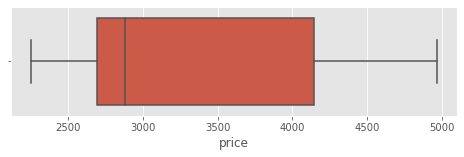

In [376]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x = Gold_Price['price'], whis=1.5)

There are no outliers present in my dataset


# Data visualization

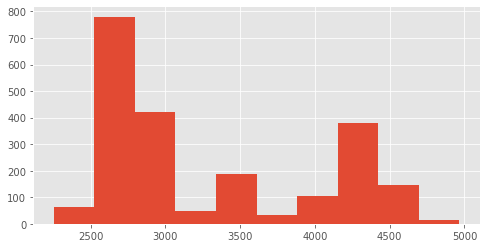

In [377]:
plt.figure(figsize=(8,4))
Gold_Price_New.hist()
plt.show()

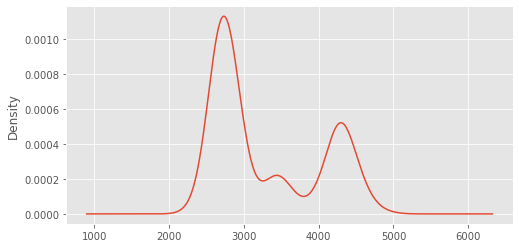

In [378]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot(kind='kde')
plt.show()

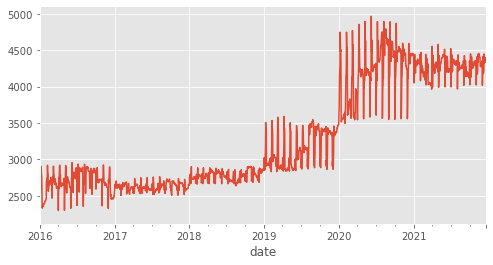

In [379]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot()
plt.show()

Trend is upward or positive

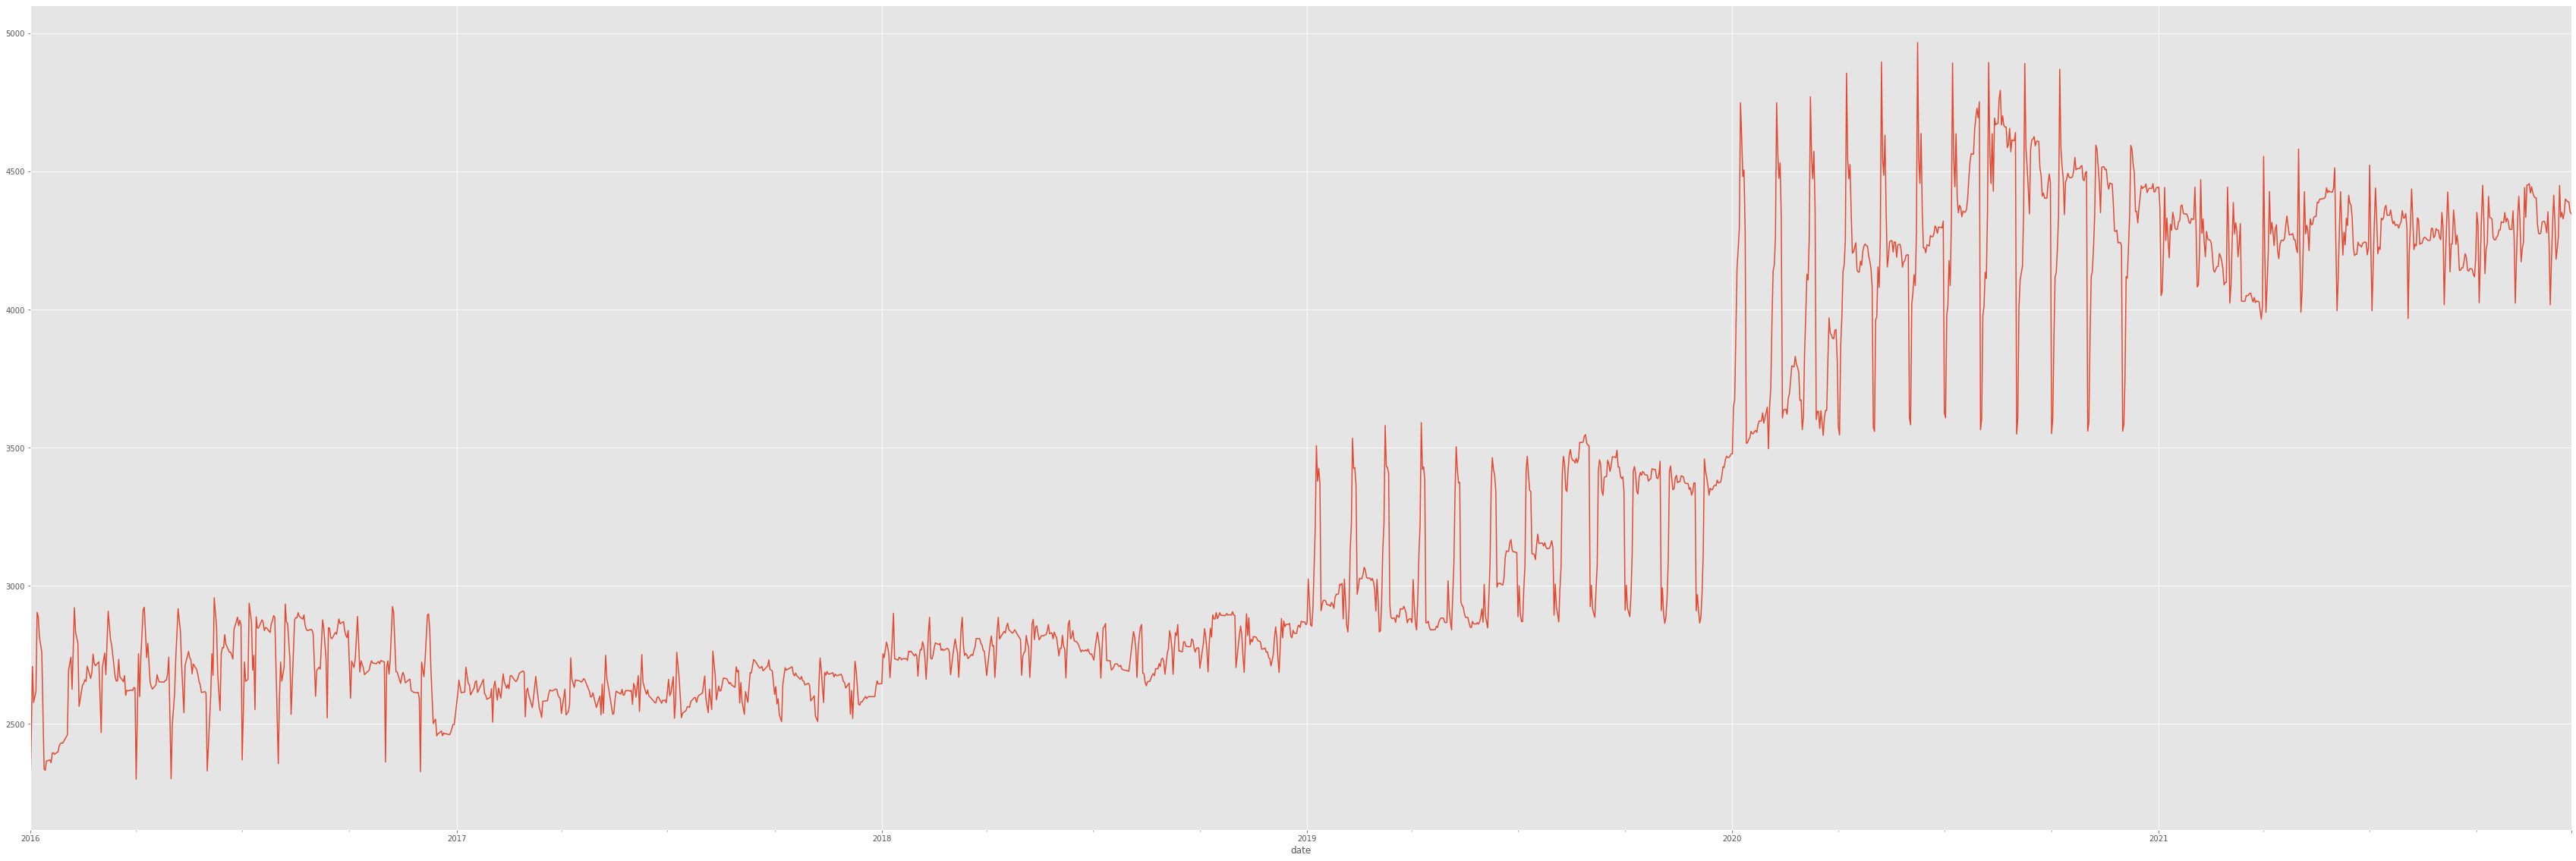

In [380]:
plt.figure(figsize=(60,20))
Gold_Price_New.plot()
plt.show()

Seasonality can be observed little bit

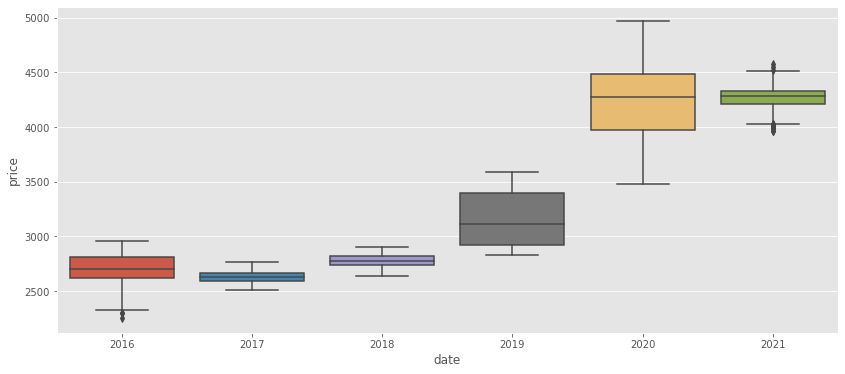

In [381]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(Gold_Price_New.index.year, Gold_Price_New, ax=ax)
plt.show()

The growth in the price has much more of an exponential growth

# Boxplot for all the month throughout all the years

In [382]:
Gold_Price['price']=round(Gold_Price['price'])
Gold_Price['Year']=Gold_Price['date'].dt.year
Gold_Price['Month_of_Year']=Gold_Price['date'].dt.month

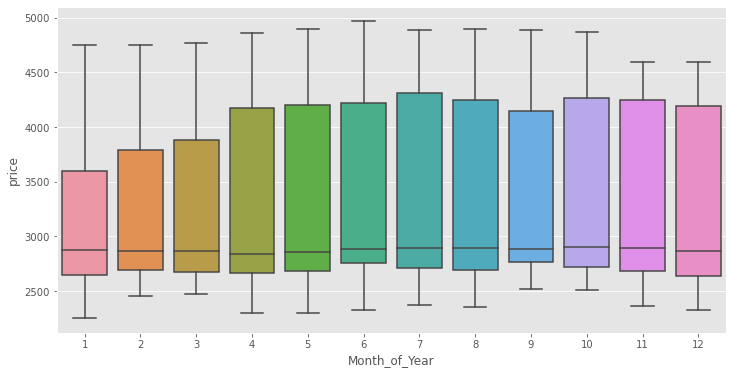

In [383]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='price',data=Gold_Price)
plt.show()

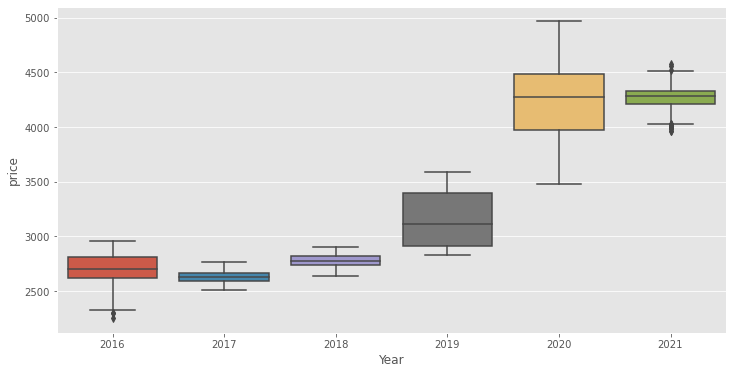

In [384]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='price',data=Gold_Price)
plt.show()

# Time series decomposition plot
To find the clear trend

To find the seasonality(Additive/Multiplicative)

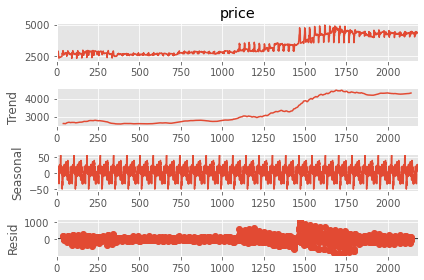

In [385]:
decompose_ts_add = seasonal_decompose(Gold_Price['price'], period=80 )
decompose_ts_add.plot()
plt.show()

In [386]:
Gold_Price["date"]= pd.to_datetime(Gold_Price["date"])
indexdata=Gold_Price.set_index(["date"])

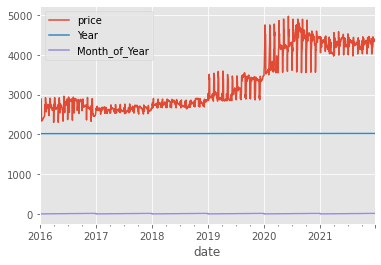

In [387]:
indexdata.plot()
plt.show()

In [388]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
...,...,...,...
2021-08-31,4264.870968,2021.0,8.0
2021-09-30,4207.533333,2021.0,9.0
2021-10-31,4289.129032,2021.0,10.0


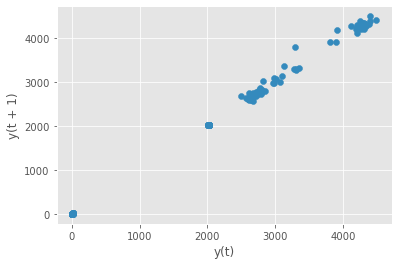

In [389]:
lag_plot(quarterly_mean_sales)
plt.show()

# Checking for stationality

In [390]:
test_result=adfuller(quarterly_mean_sales['price'])

In [391]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [392]:
adfuller_test(quarterly_mean_sales['price'])

ADF Test Statistic : -0.18173231421114763
p-value : 0.9406643356884156
#Lags Used : 0
Number of Observations Used : 71
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# differencing

In [393]:
quarterly_mean_sales['price'] = quarterly_mean_sales['price'] - quarterly_mean_sales['price'].shift(1)


In [394]:
quarterly_mean_sales['price'].shift(1)

date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31    192.818687
2016-04-30     -5.786429
2016-05-31     -5.103226
                 ...    
2021-08-31     45.843011
2021-09-30    -43.838710
2021-10-31    -57.337634
2021-11-30     81.595699
2021-12-31     38.537634
Freq: M, Name: price, Length: 72, dtype: float64

In [395]:
quarterly_mean_sales['price']=quarterly_mean_sales['price']-quarterly_mean_sales['price'].shift(12)


In [415]:
 quarterly_mean_sales.head(20)

,price,Year,Month_of_Year
date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
2016-06-30,NaN,2016.0,6.0
2016-07-31,NaN,2016.0,7.0
2016-08-31,NaN,2016.0,8.0
2016-09-30,NaN,2016.0,9.0


# Retest again dickey fuller test


In [397]:
adfuller_test(quarterly_mean_sales['price'].dropna())

ADF Test Statistic : -3.472136116801481
p-value : 0.008732206177923134
#Lags Used : 11
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


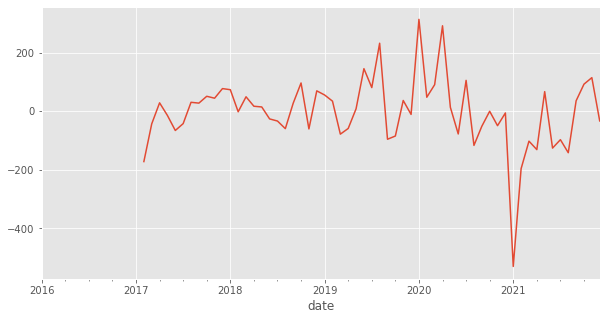

In [398]:
plt.figure(figsize=(10,5))
quarterly_mean_sales['price'].plot()
plt.show()

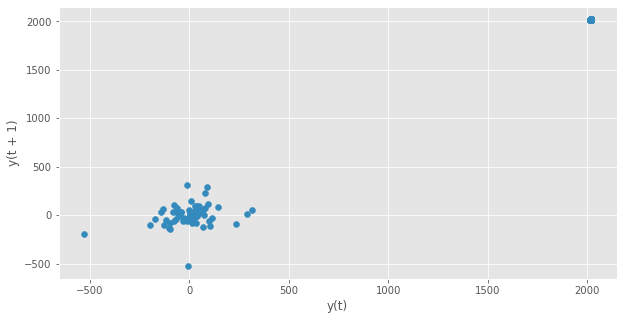

In [399]:
plt.figure(figsize=(10,5))
lag_plot(quarterly_mean_sales)
plt.show()

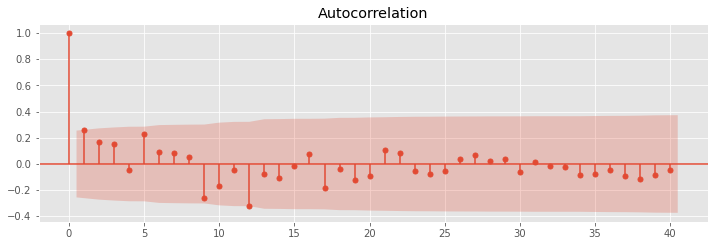

In [400]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quarterly_mean_sales['price'].iloc[13:],lags=40,ax=ax1)


# splitting data

In [401]:
train=Gold_Price[0:1528]
test=Gold_Price[1528:]

In [402]:
train.tail(10)

,date,price,Year,Month_of_Year
1518,2020-02-27,3773.0,2020,2
1519,2020-02-28,3670.0,2020,2
1520,2020-02-29,3673.0,2020,2
1521,2020-03-01,3565.0,2020,3
1522,2020-03-02,3611.0,2020,3
1523,2020-03-03,3845.0,2020,3
1524,2020-03-04,3979.0,2020,3
1525,2020-03-05,4128.0,2020,3
1526,2020-03-06,4106.0,2020,3
1527,2020-03-07,4255.0,2020,3


In [403]:
test

,date,price,Year,Month_of_Year
1528,2020-03-08,4770.0,2020,3
1529,2020-03-09,4554.0,2020,3
1530,2020-03-10,4473.0,2020,3
1531,2020-03-11,4573.0,2020,3
1532,2020-03-12,4365.0,2020,3
...,...,...,...,...
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12


# HOLT WINTERS MODEL

In [404]:
hwmodel=ExponentialSmoothing (train.price,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [405]:
test_pred=hwmodel.forecast(30)

In [406]:
test_pred

1528    4141.033018
1529    4250.152028
1530    4269.818558
1531    4286.082827
1532    4304.556924
1533    4233.318137
1534    4285.747806
1535    4441.131164
1536    4423.412674
1537    4434.474041
1538    4416.611680
1539    4422.421167
1540    4341.856370
1541    4456.267210
1542    4476.887488
1543    4493.940508
1544    4513.310524
1545    4438.616944
1546    4493.589239
1547    4656.508062
1548    4637.930297
1549    4649.528095
1550    4630.799482
1551    4636.890705
1552    4552.418841
1553    4672.378145
1554    4693.998422
1555    4711.878445
1556    4732.187828
1557    4653.871912
dtype: float64

<AxesSubplot:>

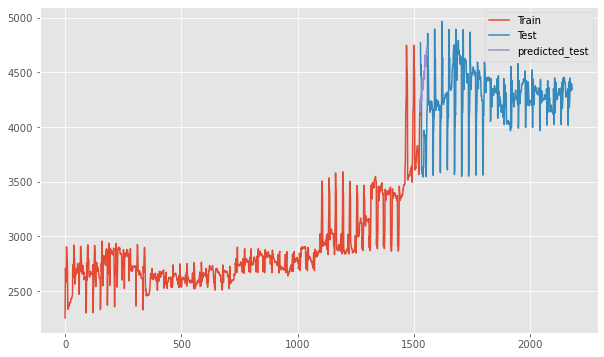

In [407]:
train['price'].plot(legend = True,label='Train',figsize=(10,6))
test['price'].plot(legend = True,label='Test')
test_pred.plot(legend = True,label='predicted_test')

# Naive model

In [408]:
train1=quarterly_mean_sales[0:50]
test1=quarterly_mean_sales[50:]

In [409]:
train1.tail(10)

,price,Year,Month_of_Year
date,,,
2019-05-31,8.000000,2019.0,5.0
2019-06-30,145.033333,2019.0,6.0
2019-07-31,80.482796,2019.0,7.0
2019-08-31,231.935484,2019.0,8.0
2019-09-30,-95.918280,2019.0,9.0
2019-10-31,-84.920430,2019.0,10.0
2019-11-30,36.420430,2019.0,11.0
2019-12-31,-11.130108,2019.0,12.0
2020-01-31,313.419355,2020.0,1.0


In [410]:
test1.head()

,price,Year,Month_of_Year
date,,,
2020-03-31,90.482441,2020.0,3.0
2020-04-30,291.476344,2020.0,4.0
2020-05-31,12.975269,2020.0,5.0
2020-06-30,-77.908602,2020.0,6.0
2020-07-31,105.102151,2020.0,7.0


In [411]:
Naive_train1 = train1.copy()
Naive_test1 = test1.copy()

In [412]:
Naive_test1['naive'] = np.asarray(train1['price'])[len(np.asarray(train1['price']))-1]
Naive_test1['naive'].head(1)

date
2020-03-31    47.485301
Freq: M, Name: naive, dtype: float64

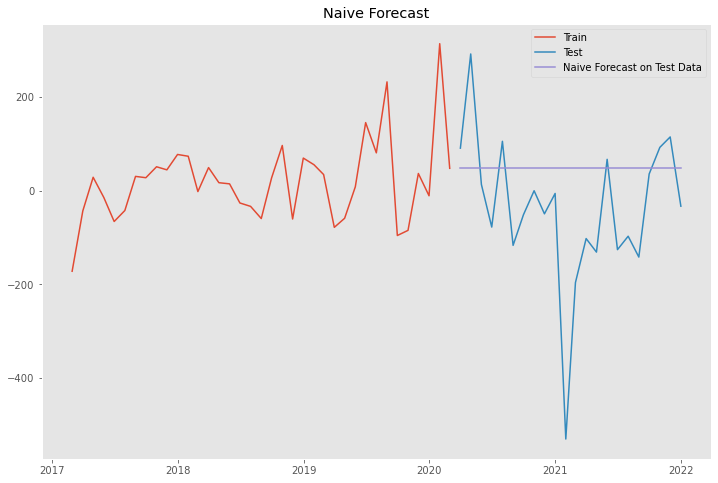

In [413]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train1['price'], label='Train')
plt.plot(test1['price'], label='Test')
plt.plot(Naive_test1['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Building

In [417]:
quarterly_mean_sales['t']=np.arange(1,73)
quarterly_mean_sales['t_sq']=quarterly_mean_sales['t']*quarterly_mean_sales['t']
quarterly_mean_sales['log_gold']=np.log(quarterly_mean_sales['price'])


In [418]:
Train=quarterly_mean_sales[0:50]
Test=quarterly_mean_sales[51:70]

In [419]:
Test.set_index(np.arange(1,20),inplace=True)

# Linear Model

In [420]:
linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear

220.46394043177543

# Exponential

In [421]:
Exp = smf.ols('log_gold~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

236.81881386165958

# Quadratic

In [423]:
Quad = smf.ols('price~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

211.8204754845018

In [424]:
Gold_Price = quarterly_mean_sales.iloc[:,0:1]
Gold_Price

,price
date,
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,NaN
2016-04-30,NaN
2016-05-31,NaN
...,...
2021-08-31,-141.935484
2021-09-30,35.365591
2021-10-31,92.182796


# Additive seasonality

In [426]:
add_sea = smf.ols('price~Month_of_Year',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_of_Year']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

174.75388141949597

# Additive Seasonality With Quadratic Trend

In [427]:
add_sea_Quad = smf.ols('price~t+t_sq+Month_of_Year',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_of_Year','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

209.57816700211515

# Multiplicative Seasonality

In [428]:
Mul_sea = smf.ols('log_gold~Month_of_Year',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

188.17870978809535

# Multiplicative With Additive Seasonality

In [429]:
Mul_Add_sea = smf.ols('log_gold~t+Month_of_Year',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

240.60051091673634

# ACF and PACF plots

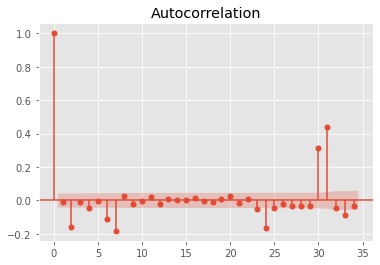

In [430]:
plot_acf(Gold_Price_New.diff().dropna());

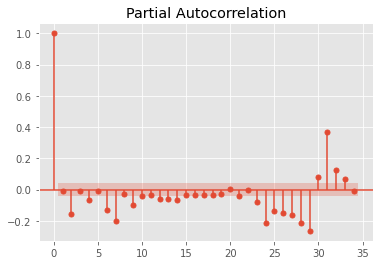

In [431]:
plot_pacf(Gold_Price_New.diff().dropna());

# ARIMA model

In [432]:
model=ARIMA(Gold_Price['price'].dropna(),order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -359.760
Method:                       css-mle   S.D. of innovations            115.984
Date:                Mon, 18 Jul 2022   AIC                            727.521
Time:                        16:13:05   BIC                            735.763
Sample:                    03-31-2017   HQIC                           730.731
                         - 12-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7852      1.204     -0.652      0.514      -3.145       1.574
ar.L1.D.price     0.2759      0.131      2.106      0.035       0.019       0.533
ma.L1.D.price    -1.0000      0.073    -

<AxesSubplot:xlabel='date'>

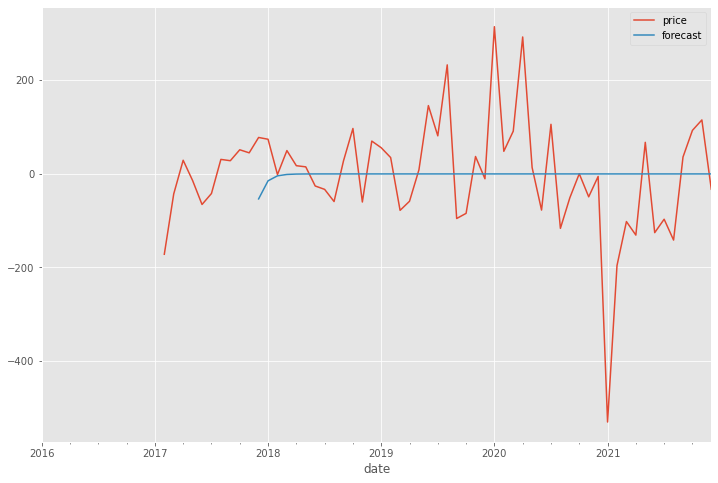

In [433]:
Gold_Price['forecast']=model_fit.predict(start=10,end=73,dynamic=True)
Gold_Price[['price','forecast']].plot(figsize=(12,8))

In [434]:
model=sm.tsa.statespace.SARIMAX(Gold_Price['price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

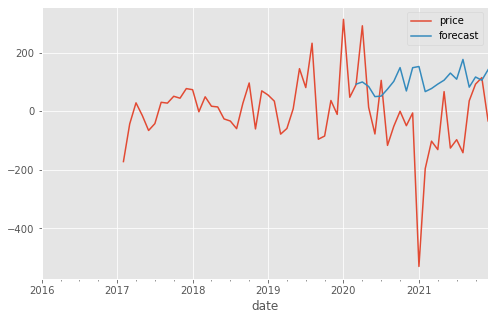

In [435]:
Gold_Price['forecast']=results.predict(start=50,end=73,dynamic=True)
Gold_Price[['price','forecast']].plot(figsize=(8,5))
plt.show()

In [436]:
Gold_Price.forecast

date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31           NaN
2016-04-30           NaN
2016-05-31           NaN
                 ...    
2021-08-31    176.570657
2021-09-30     81.935098
2021-10-31    116.583728
2021-11-30    105.562225
2021-12-31    141.593548
Freq: M, Name: forecast, Length: 72, dtype: float64

In [437]:
Gold_Price4 = Gold_Price.iloc[:,0:1].dropna()
Gold_Price4

,price
date,
2017-02-28,-172.175830
2017-03-31,-43.372557
2017-04-30,28.386022
2017-05-31,-14.837634
2017-06-30,-65.995699
2017-07-31,-42.584946
2017-08-31,30.225806
2017-09-30,27.425806
2017-10-31,50.767742


In [438]:
# separating a validation dataset
split_point = len(Gold_Price4) - 30
dataset, validation = Gold_Price4[0:split_point], Gold_Price4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 29, Validation 30


In [439]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [440]:
 #walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse_wf = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse_wf)

>Predicted=49.037, Expected=16.777
>Predicted=16.777, Expected=14.319
>Predicted=14.319, Expected=-26.519
>Predicted=-26.519, Expected=-33.739
>Predicted=-33.739, Expected=-59.710
>Predicted=-59.710, Expected=27.082
>Predicted=27.082, Expected=96.209
>Predicted=96.209, Expected=-60.709
>Predicted=-60.709, Expected=69.322
>Predicted=69.322, Expected=55.129
>Predicted=55.129, Expected=34.159
>Predicted=34.159, Expected=-78.514
>Predicted=-78.514, Expected=-59.129
>Predicted=-59.129, Expected=8.000
>Predicted=8.000, Expected=145.033
RMSE: 79.280


# Grid search method by ARIMA model

In [441]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse_gs = sqrt(mean_squared_error(test, predictions))
    return rmse_gs

In [442]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse_gs = evaluate_arima_model(train, order)
                    if rmse_gs < best_score:
                        best_score, best_cfg = rmse_gs, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse_gs))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [443]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=63.642
ARIMA(0, 0, 1) RMSE=73.534
ARIMA(0, 0, 2) RMSE=74.221
ARIMA(0, 0, 3) RMSE=77.813
ARIMA(0, 0, 4) RMSE=79.973
ARIMA(0, 1, 0) RMSE=81.207
ARIMA(0, 1, 1) RMSE=83.204
ARIMA(0, 1, 2) RMSE=83.558
ARIMA(0, 1, 3) RMSE=102.285
ARIMA(0, 1, 4) RMSE=106.872
ARIMA(0, 2, 0) RMSE=121.765
ARIMA(0, 2, 1) RMSE=88.286
ARIMA(0, 2, 2) RMSE=90.472
ARIMA(0, 2, 3) RMSE=95.527
ARIMA(0, 2, 4) RMSE=103.249
ARIMA(1, 0, 0) RMSE=69.677
ARIMA(1, 1, 0) RMSE=84.193
ARIMA(1, 2, 0) RMSE=110.486
ARIMA(2, 0, 0) RMSE=72.504
ARIMA(2, 1, 0) RMSE=91.533
ARIMA(2, 2, 0) RMSE=113.568
ARIMA(3, 0, 0) RMSE=79.289
ARIMA(3, 1, 0) RMSE=87.197
ARIMA(3, 2, 0) RMSE=105.204
ARIMA(4, 0, 0) RMSE=78.038
ARIMA(4, 1, 0) RMSE=90.540
ARIMA(4, 2, 0) RMSE=100.892
Best ARIMA(0, 0, 0) RMSE=63.642


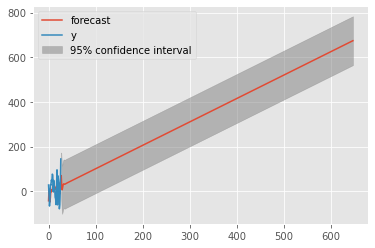

In [444]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [445]:
forecast

array([70.48414037, 23.24547797,  6.72182125, 17.33850204, 28.70439845,
       33.24559307, 32.85801575, 31.91698896, 32.22290533, 33.48528468,
       34.90850998, 36.1134631 , 37.13217154, 38.11055767, 39.12625734,
       40.17798004, 41.23915571, 42.29410887, 43.34215125, 44.38806874,
       45.43499142, 46.48322882, 47.53192978, 48.58047545, 49.62877312,
       50.67697195, 51.72519317, 52.77346076, 53.82174905, 54.87003448])

In [446]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse_forecast = sqrt(mean_squared_error(val[1], forecast))
rmse_forecast

165.48121889328107

# Model Evaluation


In [447]:
newdata=pd.read_csv(r"C:\Users\Trupti Kendre\Downloads\Gold_data.csv")

In [448]:
newdata

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [449]:
newdata['date']= pd.to_datetime(newdata['date'])
newdata=newdata.set_index(['date'])

In [450]:
# fit model
Gold_Price1=newdata.dropna()
#df= newdf.set_index('observation_date').dropna()

# prepare data
X = Gold_Price1.values
X = X.astype('float32')

In [451]:
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2181
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -13310.820
Method:                       css-mle   S.D. of innovations            108.192
Date:                Mon, 18 Jul 2022   AIC                          26633.639
Time:                        16:14:14   BIC                          26667.765
Sample:                             1   HQIC                         26646.115
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8325      0.313      2.658      0.008       0.219       1.447
ar.L1.D.y      0.8704      0.022     39.497      0.000       0.827       0.914
ar.L2.D.y     -0.1507      0.028     -5.346      0.0

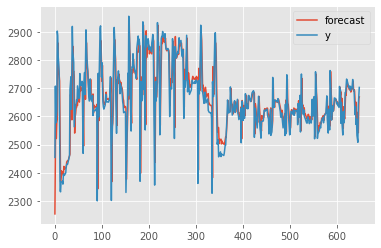

In [452]:
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [453]:
forecast

array([4346.68350497, 4346.70530696, 4346.57700255, 4346.66829188,
       4346.96656338, 4347.40560073, 4347.94515041, 4348.55963008,
       4349.23006907, 4349.94212677, 4350.68511009, 4351.4510795 ,
       4352.23413613, 4353.02989486, 4353.8350958 , 4354.64731566,
       4355.46475309, 4356.28606904, 4357.11026812, 4357.93661039,
       4358.76454582, 4359.59366553, 4360.4236656 , 4361.25432007,
       4362.08546101, 4362.91696357, 4363.74873493, 4364.58070612,
       4365.41282585, 4366.24505599])

In [454]:
pd.DataFrame(forecast)

,0
0,4346.683505
1,4346.705307
2,4346.577003
3,4346.668292
4,4346.966563
5,4347.405601
6,4347.945150
7,4348.559630
8,4349.230069
9,4349.942127


In [455]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_wf","rmse_forecast","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea "]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_wf,rmse_forecast,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea ])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_wf,79.280003
4,rmse_forecast,165.481219
5,rmse_add_sea,174.753881
7,rmse_Mult_sea,188.178710
6,rmse_add_sea_quad,209.578167
2,rmse_Quad,211.820475
0,rmse_linear,220.463940
1,rmse_Exp,236.818814
8,rmse_Mult_add_sea,240.600511


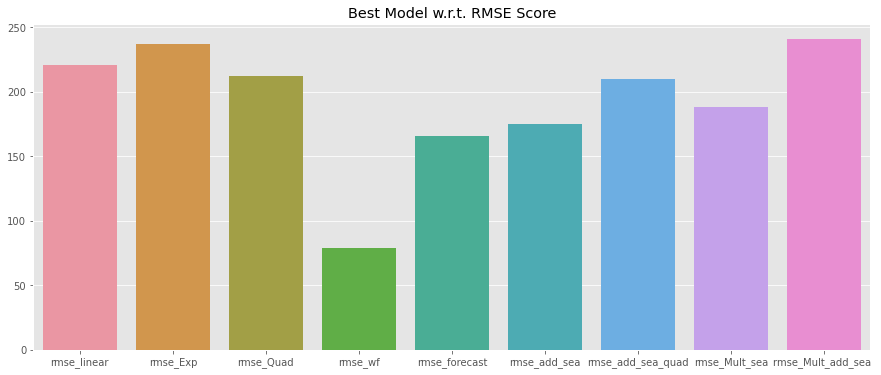

In [463]:
plt.style.use('ggplot') 
plt.figure(figsize=(15,6))
sns.barplot(x='MODEL',y='RMSE_Values',data=data)
plt.title("Best Model w.r.t. RMSE Score") 
plt.show()